In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import random
from tqdm import tqdm

In [2]:
class arms:
    def __init__(me,delta,T):
        me.arm1=random.normal(loc=0, scale=1, size=T)
        me.arm2=random.normal(loc=delta, scale=1, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getloss(me, it):
        return [me.arm1[it],me.arm2[it]]

In [3]:
class newbandits:
    def __init__(me,alpha):
        me.mean=np.zeros((2,1))
        me.count=np.zeros((2,1))
        me.ucb=np.zeros((2,1))
        #___________________
        me.alpha=alpha
            
    def update(me,loss,arm,t):
        T=10000
        #update after t for t+1
        updt= me.mean[arm][0]*me.count[arm][0]+loss
        me.count[arm][0]+=1
        me.mean[arm][0]=updt/me.count[arm][0]
        #___________________
        me.ucb[arm][0]= me.mean[arm][0]+me.alpha*np.sqrt(np.log(T)/(me.count[arm][0]))
        

    def getUCB(me):
        return [me.ucb[0][0], me.ucb[1][0]]
        
    def returnarm(me):
        return me.mean[0][0],me.mean[1][0],

In [4]:
def UCB(alpha,T=1000,arms=[0 for k in range(1000)]):
    loss=0
    loss1=0
    loss2=0
    regretbound=[]
    arm=arms
    known_bandits=newbandits(alpha)
    chk=0
    for t in range(0,T):
        lossvec=np.array(arm.getloss(t-1))
        lossvec=1-lossvec
        loss1+=lossvec[0]
        loss2+=lossvec[1]
        #_______
        if t<2:
            i=t
            loss+=lossvec[i]
            known_bandits.update(lossvec[i],i,t)
            regretbound.append(np.amax([loss1,loss2])-loss)
        else:
            i=np.argmax(known_bandits.getUCB())
            if chk==0:
#                 print(i)
                chk=1
            loss+=lossvec[i]
            known_bandits.update(lossvec[i],i,t)
            regretbound.append(np.amax([loss1,loss2])-loss)
#     print(i)
#     print(known_bandits.returnarm())
#     print(known_bandits.getUCB())
#     print([known_bandits.count1,known_bandits.count2])
#     print([loss1,loss2,loss])
#     print(full_bandits.returnarm())
#     print(full_bandits.getUCB())
#     print([full_bandits.count1,full_bandits.count2])
#     regret=loss- np.amin([loss1,loss2])
#     print(regret)
#     print(regretbound)
    return regretbound
        
        
        
    

In [5]:

ucb=np.array([0.0 for i in range (10000)])
for i in range(100):
    arm=arms(0.1,10000)
    ucb+=np.array(UCB(1,10000,arm))
ucb=ucb/100
plt.plot(ucb)

KeyboardInterrupt: 

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.39s/it]


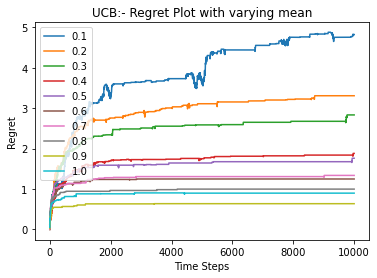

In [16]:

for i in tqdm(range(1,11)):
    j=i/10
    ukla=np.array([0.0 for i in range(10000)])
    for i in range(10):
        arm=arms(j,10000)
        ukla+=np.array(UCB(1,10000,arm))
    ukla=ukla/100
    plt.plot(ukla,label=str(j))
    
plt.legend(loc='best')
plt.title("UCB:- Regret Plot with varying mean")
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.show()


No handles with labels found to put in legend.


Text(0, 0.5, 'Regret')

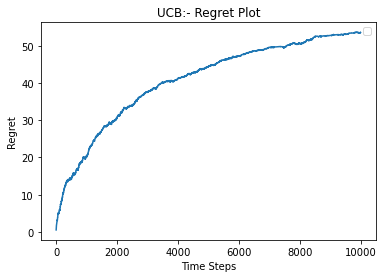

In [70]:
plt.plot(ucb)
plt.legend(loc='best')
plt.title("UCB:- Regret Plot")
plt.xlabel('Time Steps')
plt.ylabel('Regret')

In [10]:
def arand(T,arm):
    loss=0
    loss1=0
    loss2=0
    regretbound=[]
    for t in range(1,T+1):
        lossvec=arm.getloss(t-1)
        #____
        loss1-=lossvec[0]
        loss2-=lossvec[1]
        #_______%2+1
        i=t%2+1
        loss-=lossvec[i-1]
        regretbound.append(loss- np.amin([loss1,loss2]))
       
    return regretbound

In [11]:
from tqdm import tqdm
medianu=np.array([0.0 for i in range (10000)])
maxi=np.array([0.0 for i in range(10000)])
mini=np.array([0.0 for i in range(10000)])
medianr=np.array([0.0 for i in range (10000)])
itera=10
for i in tqdm(range(itera)):
    arm=arms(0.1,10000)
    medianu+=np.array(UCB(0.5,10000,arm))
    maxi+=np.array(UCB(1,10000,arm))
    mini+=np.array(UCB(2,10000,arm))
    medianr+=np.array(arand(10000,arm))

medianu=medianu/itera
medianr=medianr/itera
maxi= maxi/itera
mini=mini/itera

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.34it/s]


Text(0, 0.5, 'Regret')

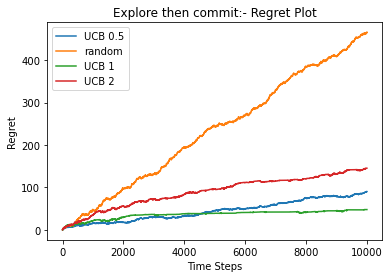

In [14]:
import matplotlib.pyplot as plt
plt.plot(medianu, label='UCB 0.5')
plt.plot(medianr, label='random')
plt.plot(maxi, label='UCB 1')
plt.plot(mini, label='UCB 2')
plt.legend(loc='best')
plt.title("Explore then commit:- Regret Plot")
plt.xlabel('Time Steps')
plt.ylabel('Regret')

In [23]:
def run_ucb(mean2):
  mean1 = 0
  mean2 = mean2
  T = 10000

  np.random.seed(1)
  loss1 =  np.random.normal(loc=mean1, scale= 1, size = (T,1))
  loss2 =  np.random.normal(loc=mean2, scale= 1, size = (T,1))
  data = np.concatenate((loss1, loss2), axis = 1)

  data = 1 - data

  alpha = 1
  played_counter = np.ones((2,1))
  estimates = np.zeros((2,1))
  estimates[0][0] = data[0][0]
  estimates[1][0] = data[0][1]

  regrets = []
  regret = 0
  for t in range(T):
      p = np.zeros((2,1))
      for idx in range(2):
        p[idx][0] = estimates[idx][0] + alpha * np.sqrt(np.log(T)/played_counter[idx][0])

      best_idx = np.argmax(p)
      estimates[best_idx][0] = (played_counter[best_idx][0] * estimates[best_idx][0] + 1 * data[t][best_idx])/(played_counter[best_idx][0]+ 1)
      played_counter[best_idx] += 1   

      regret += np.abs(data[t][best_idx] - data[t][0])
      regrets.append(regret)
      
    

  plt.plot(regrets)
#   plt.title("UCB")
#   plt.ylabel("Regret")
#   plt.show()